<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/ejercicio_kmeans/ejercicio_kmeans_Marc_Bonastre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio: Aplicar k-means a los datos mpg (cars, variables numéricas):
Cargar datos
Eliminar variables no-numéricas
Representar pairplot y decidir cuángos clústers vamos a buscar
Aplicar k-means
Representar el resultado como un pairplot con grupos (clústeres)

In [0]:
import pandas as pd 
import seaborn as sns 
mpg = sns.load_dataset("mpg")
mpg = mpg.drop(columns='cylinders')

datos originales = (398, 8)
datos numericos = (392, 8)
datos numericos sin NaNs = (392, 6)


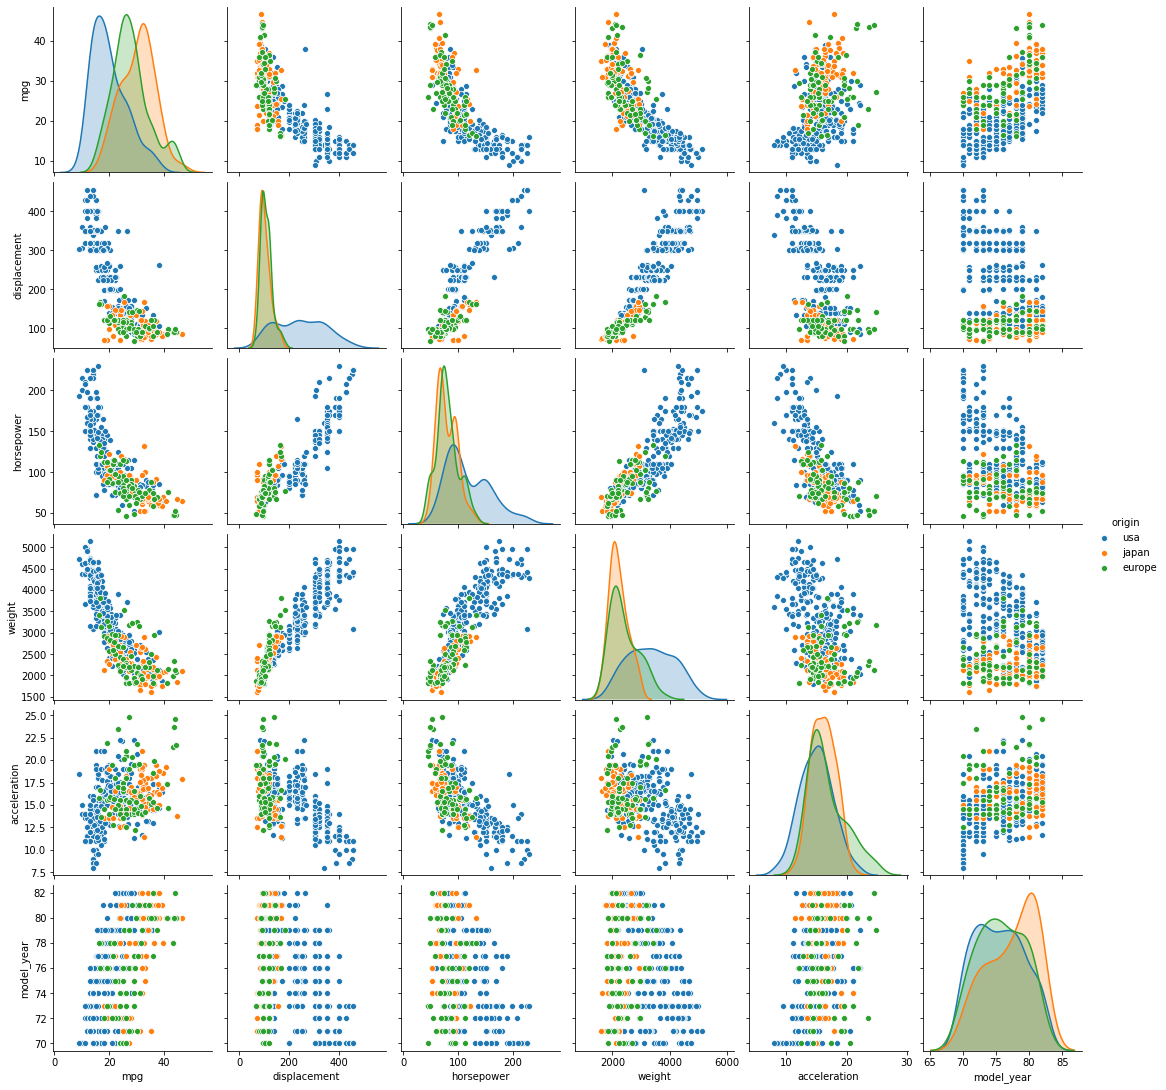

In [30]:
mpg_num = mpg.dropna() # remove observations with NaNs
mpg_num_nonans = mpg_num.select_dtypes(include='number') # keep only numeric variables 

print('datos originales = {}'.format(mpg.shape))
print('datos numericos = {}'.format(mpg_num.shape))
print('datos numericos sin NaNs = {}'.format(mpg_num_nonans.shape))

mpg.shape
g = sns.pairplot(mpg, hue="origin")

In [31]:
mpg_num.columns

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year', 'origin', 'name'],
      dtype='object')

In [32]:
mpg_num_nonans.columns

Index(['mpg', 'displacement', 'horsepower', 'weight', 'acceleration',
       'model_year'],
      dtype='object')

In [0]:
X = mpg_nonans[['mpg', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year']] # features
y = mpg_nonans['origin'] # class labels

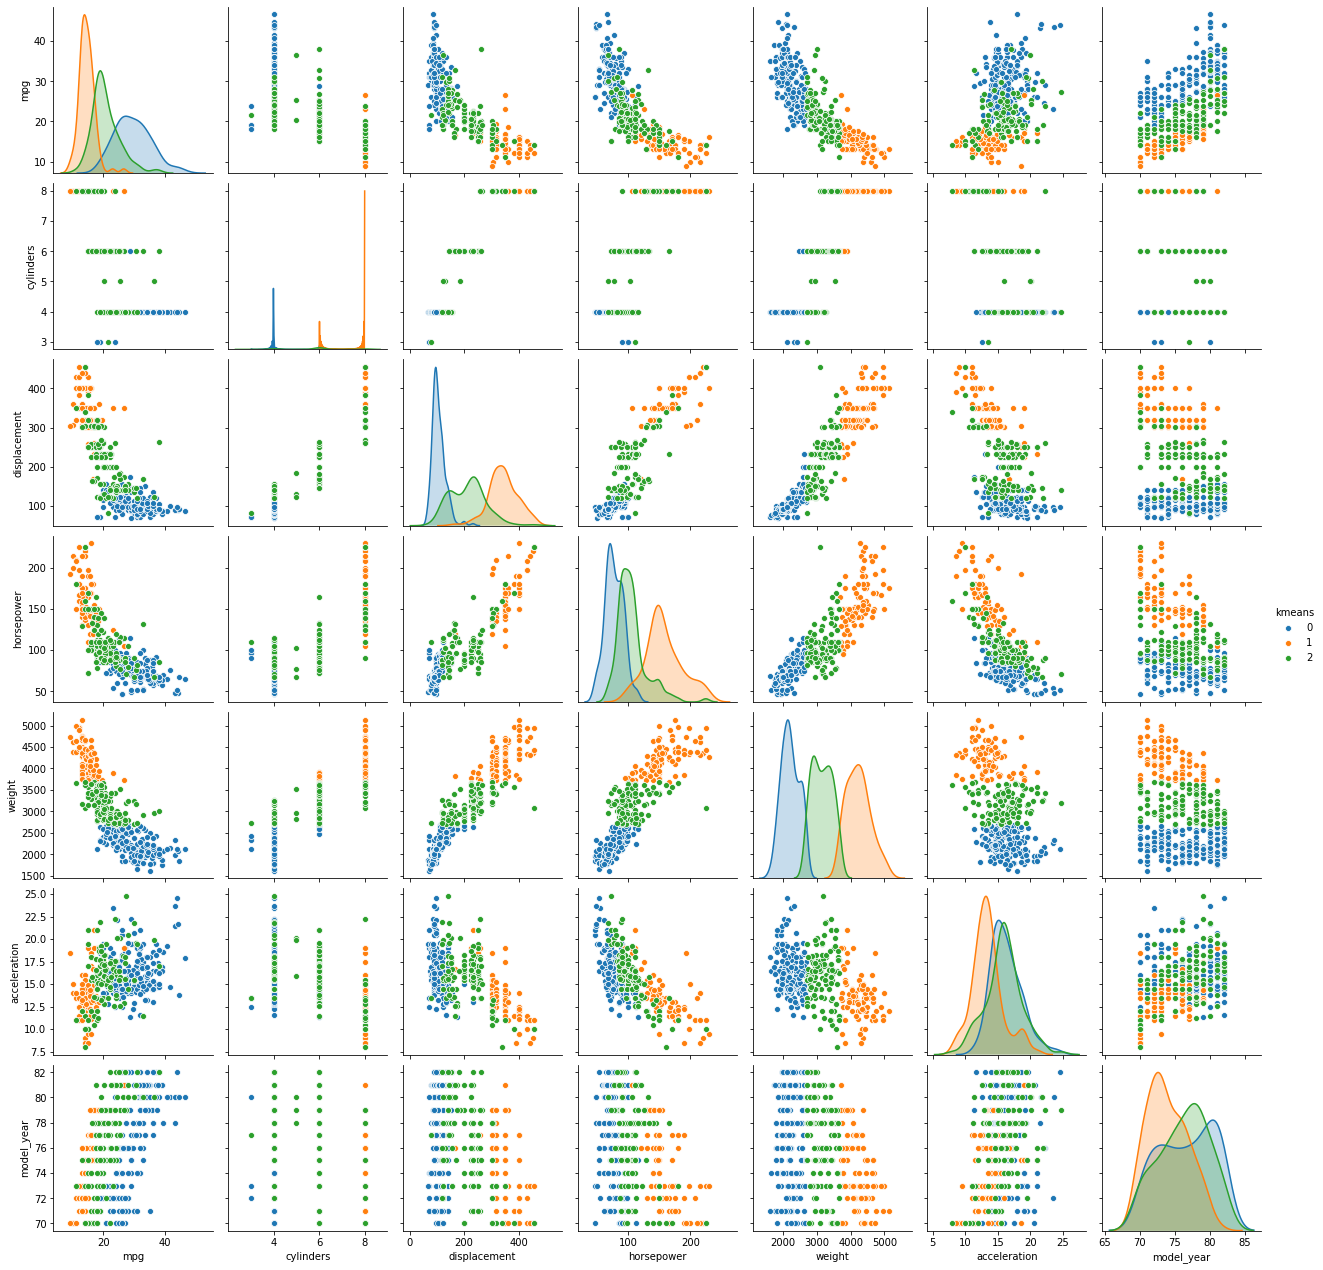

In [34]:
from sklearn.cluster import KMeans
group = KMeans(n_clusters=3).fit_predict(X)

mpg_grouped = mpg_nonans
mpg_grouped['kmeans'] = group
g = sns.pairplot(mpg_grouped, hue="kmeans")

In [35]:
mpg_grouped.head(150)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,kmeans
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,2
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,1
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,2
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,2
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,2
...,...,...,...,...,...,...,...,...,...,...
147,24.0,4,90.0,75.0,2108,15.5,74,europe,fiat 128,0
148,26.0,4,116.0,75.0,2246,14.0,74,europe,fiat 124 tc,0
149,24.0,4,120.0,97.0,2489,15.0,74,japan,honda civic,0
150,26.0,4,108.0,93.0,2391,15.5,74,japan,subaru,0


In [36]:
kmeans_result = KMeans(n_clusters=3).fit(X)
print('Etiquetas de asignacion a clusters {}'.format(kmeans_result.labels_))
print('Posición de los centroides de los clusters {}'.format(kmeans_result.cluster_centers_))
print('Número de iteraciones necesarias {}'.format(kmeans_result.n_iter_))

Etiquetas de asignacion a clusters [0 1 0 0 0 1 1 1 1 1 0 0 1 0 2 0 0 2 2 2 2 2 2 2 2 1 1 1 1 2 2 2 2 0 0 0 0
 1 1 1 1 1 1 1 0 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 0 1 1 1 1 2 1 1 1
 1 0 2 0 2 2 2 2 2 2 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 2 1 1 1 1 0 2 2 2 2
 2 2 2 1 1 2 2 2 0 0 2 0 0 0 0 0 2 2 2 2 1 0 0 1 1 1 1 1 2 2 2 2 2 2 2 2 2
 2 2 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 2 2 0 2 0 2 2 0 2 0 2 0 0 2 2 2 2 2 2 2
 1 1 1 1 0 0 0 0 2 2 2 2 0 0 0 0 2 2 2 2 0 1 0 0 1 1 1 1 1 2 2 2 2 2 1 1 1
 1 0 0 0 0 1 1 1 1 2 0 2 0 2 2 2 2 0 2 0 2 2 2 2 2 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 2 2 2 2 2 0 0 2 0 0 0 0 2 2 0 0 0 0 0 1 1 1 1 1 1 0 1 2 2 2 2 0
 1 0 0 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 0 2 0 2 2 2 2 0 2 2 2 0 0 2 2 2 0 2 2
 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 1 0 0 2 2 2 2 2 0 0 2
 2 2 2 2 2 2 2 2 2 2 0 0 2 0 2 2 0 0 2 2 2 0]
Posición de los centroides de los clusters [[  20.78934426  212.6147541   105.40163934 3162.58196721   15.90409836
    76.35245902]
 [  14.63555556  344.14444444  157.81